<a href="https://colab.research.google.com/github/brianshin12/zeta/blob/master/Lorenz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lorenz 방정식  
기후예측문제는 오랫동안 사람들이 꿈꾸어오던 문제입니다.  
이 문제는 유체 역학의 문제로 쓰면, 행성의 운동 보다는 훨씬 더 복잡한 문제일지는 몰라도,  
결국 시간에 대한 미분방정식(역학계)이고, 계산만 충분히 빠르면 얼마든지 예측이 가능한 문제라고 생각했습니다.   
그렇다면 실제 상황이 아닌 간단한 모형에서는 그리 빠른 계산기가 아니더라도 가능할 것이라는 생각에서 로렌츠는 다음과 같이 간단한 기후모형을 만들고 거기서 계산을 했습니다.
* Lorenz 방정식  
$
\begin{align*}
x'(t) &= \sigma(y - x)\\ 
y'(t) &= x(\rho - z) - y \\ 
z'(t) &= x y - \beta z
\end{align*}
$  
($\sigma, \rho, \beta$를 매개변수로 이용)

이 방법은 훌륭했으나 결과는 예상 밖이 였습니다. 이 시뮬레이션의 과정에서 초기치를 아주 조금만 바꾸어도  
상당시간 후에는 전혀 비슷하지도 않은 기후가 전개된다는 사실을 발견했습니다.  
나비 한마리가 날개짓을 한번 더해도 몇 달 후에 지구 반대편에 폭풍우가 생긴다고 하여, 이 현상을 나비효과(butterfly effect)라고 불렀습니다.


In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.integrate import solve_ivp
import sympy

In [0]:
#로렌츠 방정식 정의
def f(t, xyz):
  x, y, z = xyz
  return [sigma * (y - x),
          x * (rho - z) - y,
          x * y - beta * z]

In [0]:
#초기값, 매개변수값 강의자료를 이용했습니다.
xyz0 = [1.0, 1.0, 1.0]
t = (0, 100)
rho, sigma, beta = 28, 8, 8/3

In [0]:
xyz1 = solve_ivp(f, t, xyz0)

In [0]:
#매개변수 변화
rho, sigma, beta = 56, 8, 8/3
xyz2 = solve_ivp(f, t, xyz0)

In [0]:
rho, sigma, beta = 14, 8, 8/3
xyz3 = solve_ivp(f, t, xyz0)

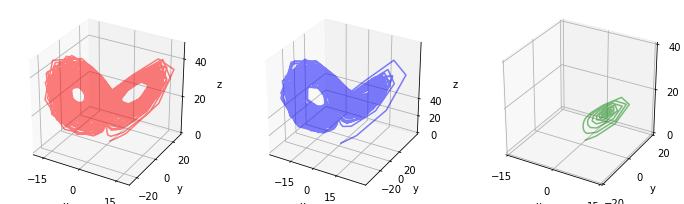

In [62]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig, (first, second, third) = plt.subplots(1, 3, figsize=(12, 3.5), subplot_kw={'projection': '3d'})

for ax, xyz, c in [(first, xyz1, 'r'), (second, xyz2, 'b'), (third, xyz3, 'g')]:
    ax.plot(xyz.y[0], xyz.y[1], xyz.y[2], c, alpha=0.5)
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10)
    ax.set_zlabel('z', fontsize=10)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])